## Importing libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

### Dataset characteristics

* Number of instances
    - 20640

* Number of attributes
    - 8 numeric, predictive attritbutes and the target

* Attribute information
    - MedInc median income in block
    - HouseAge median house age in block
    - AveRooms average number of rooms
    - AveBedrms average number of bedrooms
    - Population block population
    - AveOccup average house occupancy
    - Latitude house block latitude
    - Longitude house block longitutde

* Target
    - The target variable is the median house value in units of 1000,000 for california districts

In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
X_train.shape

(11610, 8)

## Creating model

In [9]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape=[8]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)                                                 
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics = ['mae'])

#lr = learning rate

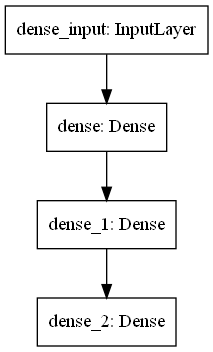

In [12]:
import pydot
keras.utils.plot_model(model)

In [13]:
model_history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid))

Epoch 1/30
363/363 [==============================] - 3s 7ms/step - loss: 3.3697 - mae: 1.4280 - val_loss: 0.7126 - val_mae: 0.6368
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6964 - mae: 0.6267 - val_loss: 0.6880 - val_mae: 0.5704
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6167 - mae: 0.5701 - val_loss: 0.5803 - val_mae: 0.5352
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5846 - mae: 0.5491 - val_loss: 0.5166 - val_mae: 0.5207
Epoch 5/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5321 - mae: 0.5292 - val_loss: 0.4895 - val_mae: 0.5022
Epoch 6/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5083 - mae: 0.5146 - val_loss: 0.4951 - val_mae: 0.4934
Epoch 7/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5044 - mae: 0.5060 - val_loss: 0.4861 - val_mae: 0.4838
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.

In [14]:
mae_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3727 - mae: 0.4346


In [15]:
model_history.history

{'loss': [1.8866397142410278,
  0.6577127575874329,
  0.5934185981750488,
  0.5557191967964172,
  0.5271904468536377,
  0.5032975673675537,
  0.48535558581352234,
  0.47091811895370483,
  0.45779934525489807,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.4260515868663788,
  0.42017653584480286,
  0.41549986600875854,
  0.4111650586128235,
  0.4077068865299225,
  0.4039528965950012,
  0.4004494547843933,
  0.3979603350162506,
  0.39491623640060425,
  0.392380952835083,
  0.3898072838783264,
  0.3874099850654602,
  0.38507524132728577,
  0.38291803002357483,
  0.3808581829071045,
  0.3787591755390167,
  0.3769364356994629,
  0.37497687339782715],
 'mae': [0.9900257587432861,
  0.6041510105133057,
  0.5618006587028503,
  0.5398454070091248,
  0.5237293839454651,
  0.5112562775611877,
  0.5010154247283936,
  0.492448091506958,
  0.4857262969017029,
  0.47973746061325073,
  0.4744163453578949,
  0.4703480303287506,
  0.46740880608558655,
  0.46360209584236145,
  0.4

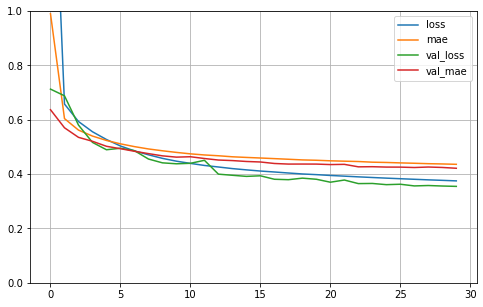

In [16]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [17]:
X_new = X_test[:3]

In [18]:
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

[[0.5808525]
 [1.9019514]
 [3.6079109]]
[0.477   0.458   5.00001]


## Functional API

* Not all neural networks models are simply sequential, some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For eaxample, a wide and deep neural network connects all or part of the inputs directly to the ouput layes

In [19]:
input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model1 = keras.models.Model(inputs=[input_], outputs = [output])

In [21]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           930         dense_3[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_4[0][0]                

In [27]:
model1.compile(loss='mean_squared_error',
              optimizer = keras.optimizers.SGD(lr=1e-3),
              metrics = ['mae'])

In [28]:
model_history = model1.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.3114 - mae: 0.3862 - val_loss: 0.3083 - val_mae: 0.3756
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3068 - mae: 0.3838 - val_loss: 0.3199 - val_mae: 0.3794
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3041 - mae: 0.3804 - val_loss: 0.3098 - val_mae: 0.3763
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.2982 - mae: 0.3798 - val_loss: 0.2986 - val_mae: 0.3757
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3024 - mae: 0.3839 - val_loss: 0.2974 - val_mae: 0.3759
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2977 - mae: 0.3783 - val_loss: 0.2960 - val_mae: 0.3736
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3032 - mae: 0.3771 - val_loss: 0.2964 - val_mae: 0.3749
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [29]:
mae_test = model1.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3001 - mae: 0.3795


In [30]:
model_history.history

{'loss': [0.3032994866371155,
  0.29533854126930237,
  0.2947326898574829,
  0.29468855261802673,
  0.29410308599472046,
  0.2940187156200409,
  0.2935331463813782,
  0.29345235228538513,
  0.293093740940094,
  0.29293689131736755,
  0.29290086030960083,
  0.29268449544906616,
  0.2924138605594635,
  0.2923218607902527,
  0.292089581489563,
  0.29221805930137634,
  0.2920016944408417,
  0.291908860206604,
  0.2916196882724762,
  0.29160845279693604],
 'mae': [0.3789478838443756,
  0.37720200419425964,
  0.3771839439868927,
  0.3770509362220764,
  0.3766150176525116,
  0.376834899187088,
  0.3760714828968048,
  0.3765028119087219,
  0.3759647011756897,
  0.3757263123989105,
  0.3753555417060852,
  0.3757006824016571,
  0.37548744678497314,
  0.3752456605434418,
  0.3752269446849823,
  0.3754868507385254,
  0.3749403953552246,
  0.3750479519367218,
  0.37473204731941223,
  0.3744659721851349],
 'val_loss': [0.3083304762840271,
  0.3199301064014435,
  0.30981963872909546,
  0.298638880252

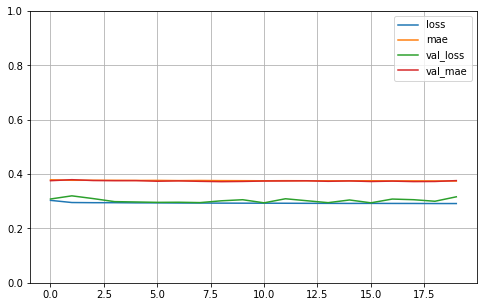

In [31]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

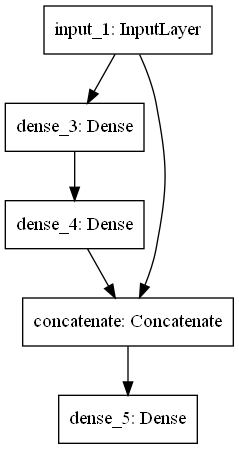

In [32]:
import pydot
keras.utils.plot_model(model1)

## Saving and Restoring

In [33]:
model1.save("Functional_api.h5")

In [34]:
%pwd

'C:\\Users\\pranj\\Desktop\\Udemy\\Deep learning'

In [35]:
#%cd C:\\users

In [36]:
del model1

In [37]:
keras.backend.clear_session()

In [38]:
model = keras.models.load_model("Functional_api.h5")

In [39]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           930         dense_3[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_4[0][0]                

In [40]:
y_pred = model.predict(X_new)
print(y_pred)

[[0.493888 ]
 [1.3456262]
 [4.559773 ]]


## Using Callbacks during training

In [41]:
keras.backend.clear_session()

In [43]:
np.random.seed(44)
tf.random.set_seed(44)

In [44]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape = [8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [45]:
model.compile(loss='mse', optimizer = keras.optimizers.SGD(lr=1e-3))

In [47]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")

In [48]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.6466 - val_loss: 0.8652
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7877 - val_loss: 0.6683
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6168 - val_loss: 0.5882
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5774 - val_loss: 0.6175
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5433 - val_loss: 0.5178
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5157 - val_loss: 0.5627
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5055 - val_loss: 0.5136
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4712 - val_loss: 0.4433
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4622 - val_loss: 0.4695
Epoch 10/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4417 - val_loss: 0.4435

In [49]:
del model
keras.backend.clear_session()

In [50]:
model = keras.models.load_model("Model-10.h5")

In [51]:
mse_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 520us/step - loss: 0.4340


In [52]:
del model
keras.backend.clear_session()

## Best Model only

In [53]:
np.random.seed(44)
tf.random.set_seed(44)

In [54]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape = [8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [55]:
model.compile(loss='mse', optimizer = keras.optimizers.SGD(lr=1e-3))

In [56]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_model.h5", save_best_only=True)

In [57]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.6466 - val_loss: 0.8652
Epoch 2/10
363/363 [==============================] - 0s 773us/step - loss: 0.7877 - val_loss: 0.6683
Epoch 3/10
363/363 [==============================] - 0s 835us/step - loss: 0.6168 - val_loss: 0.5882
Epoch 4/10
363/363 [==============================] - 0s 816us/step - loss: 0.5774 - val_loss: 0.6175
Epoch 5/10
363/363 [==============================] - 0s 810us/step - loss: 0.5433 - val_loss: 0.5178
Epoch 6/10
363/363 [==============================] - 0s 777us/step - loss: 0.5157 - val_loss: 0.5627
Epoch 7/10
363/363 [==============================] - 0s 815us/step - loss: 0.5055 - val_loss: 0.5136
Epoch 8/10
363/363 [==============================] - 0s 959us/step - loss: 0.4712 - val_loss: 0.4433
Epoch 9/10
363/363 [==============================] - 0s 884us/step - loss: 0.4622 - val_loss: 0.4695
Epoch 10/10
363/363 [==============================] - 0s 837us/step - loss: 0.4417 

In [58]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4340


0.43397656083106995

## Early stop model with large epoch value

In [59]:
del model
keras.backend.clear_session()

In [60]:
np.random.seed(44)
tf.random.set_seed(44)

In [61]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape = [8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [62]:
model.compile(loss='mse', optimizer = keras.optimizers.SGD(lr=1e-3))

In [63]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model.h5", save_best_only=True)

In [64]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# patience: Number of epochs with no improvement after which training will be stopped.

In [66]:
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4305 - val_loss: 0.4554
Epoch 2/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4224 - val_loss: 0.4139
Epoch 3/200
363/363 [==============================] - 1s 1ms/step - loss: 0.4154 - val_loss: 0.5321
Epoch 4/200
363/363 [==============================] - 1s 1ms/step - loss: 0.4098 - val_loss: 0.4499
Epoch 5/200
363/363 [==============================] - 0s 1ms/step - loss: 0.4047 - val_loss: 0.3821
Epoch 6/200
363/363 [==============================] - 0s 829us/step - loss: 0.4006 - val_loss: 0.5485
Epoch 7/200
363/363 [==============================] - 0s 843us/step - loss: 0.3975 - val_loss: 0.4423
Epoch 8/200
363/363 [==============================] - 0s 813us/step - loss: 0.3941 - val_loss: 0.3760
Epoch 9/200
363/363 [==============================] - 0s 895us/step - loss: 0.3915 - val_loss: 0.4813
Epoch 10/200
363/363 [==============================] - 0s 810us/step - loss: 0.389

In [67]:
model = keras.models.load_model("early_stop_model.h5")
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 533us/step - loss: 0.3683
